In [51]:
#Import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set_style("darkgrid")

In [52]:
#Read data and display 10 rows
data=pd.read_csv("breast-cancer.data",names=['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'])
data.head(10)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


<AxesSubplot:>

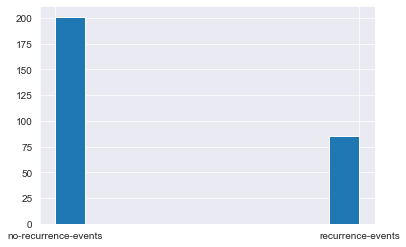

In [53]:
#Visualization
data['Class'].hist()

In [54]:
# Define a function to convert categorical features to numeric
def conversionOfCategoricalDataToNumeric(df):
    # Define mapping dictionaries for each categorical feature
    age_dict = {'20-29': 0, '30-39': 1, '40-49': 2, '50-59': 3, '60-69': 4, '70-79': 5, '80-89': 6, '90-99': 7}
    menopause_dict = {'lt40': 0, 'ge40': 1, 'premeno': 2}
    tumor_size_dict = {'0-4': 0, '5-9': 1, '10-14': 2, '15-19': 3, '20-24': 4, '25-29': 5, '30-34': 6, '35-39': 7, '40-44': 8, '45-49': 9, '50-54': 10, '55-59': 11}
    inv_nodes_dict = {'0-2': 0, '3-5': 1, '6-8': 2, '9-11': 3, '12-14': 4, '15-17': 5, '18-20': 6, '21-23': 7, '24-26': 8, '27-29': 9, '30-32': 10, '33-35': 11, '36-39': 12}
    node_caps_dict = {'no': 0, 'yes': 1}
    breast_dict = {'left': 0, 'right': 1}
    breast_quad_dict = {'left_up': 0, 'left_low': 1, 'right_up': 2, 'right_low': 3, 'central': 4}
    irradiat_dict = {'no': 0, 'yes': 1}
    class_dict = {'no-recurrence-events': 0, 'recurrence-events': 1}

    # Convert categorical features to numeric using mapping dictionaries
    df['age'] = df['age'].map(age_dict)
    df['menopause'] = df['menopause'].map(menopause_dict)
    df['tumor-size'] = df['tumor-size'].map(tumor_size_dict)
    df['inv-nodes'] = df['inv-nodes'].map(inv_nodes_dict)
    df['node-caps'] = df['node-caps'].map(node_caps_dict)
    df['breast'] = df['breast'].map(breast_dict)
    df['breast-quad'] = df['breast-quad'].map(breast_quad_dict)
    df['irradiat'] = df['irradiat'].map(irradiat_dict)
    df['Class'] = df['Class'].map(class_dict)

    # Return the updated dataframe
    return df

In [55]:
df = data

# Replace '?' values with NaN
df = df.replace('?', np.nan)

# Drop rows with any missing values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

print(df)

# Preprocess the data

# Convert categorical features to numeric
df = conversionOfCategoricalDataToNumeric(df)


print(df.head())

                    Class    age menopause tumor-size inv-nodes node-caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
272     recurrence-events  30-39   premeno      30-34       0-2        no   
273     recurrence-events  30-39   premeno      20-24       0-2        no   
274     recurrence-events  60-69      ge40      20-24       0-2        no   
275     recurrence-events  40-49      ge40      30-34       3-5        no   
276     recurrence-events  50-59      ge40      30-34       3-5        no   

     deg-malig breast breast-quad irradiat  
0            3   left    left_

In [56]:
data=df[['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']]

In [57]:
data.head(10)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,6,0,0,3,0,1,0
1,0,2,2,4,0,0,2,1,2,0
2,0,2,2,4,0,0,2,0,1,0
3,0,4,1,3,0,0,2,1,0,0
4,0,2,2,0,0,0,2,1,3,0
5,0,4,1,3,0,0,2,0,1,0
6,0,3,2,5,0,0,2,0,1,0
7,0,4,1,4,0,0,1,0,1,0
8,0,2,2,10,0,0,2,0,1,0
9,0,2,2,4,0,0,2,1,0,0


<AxesSubplot:xlabel='irradiat', ylabel='Count'>

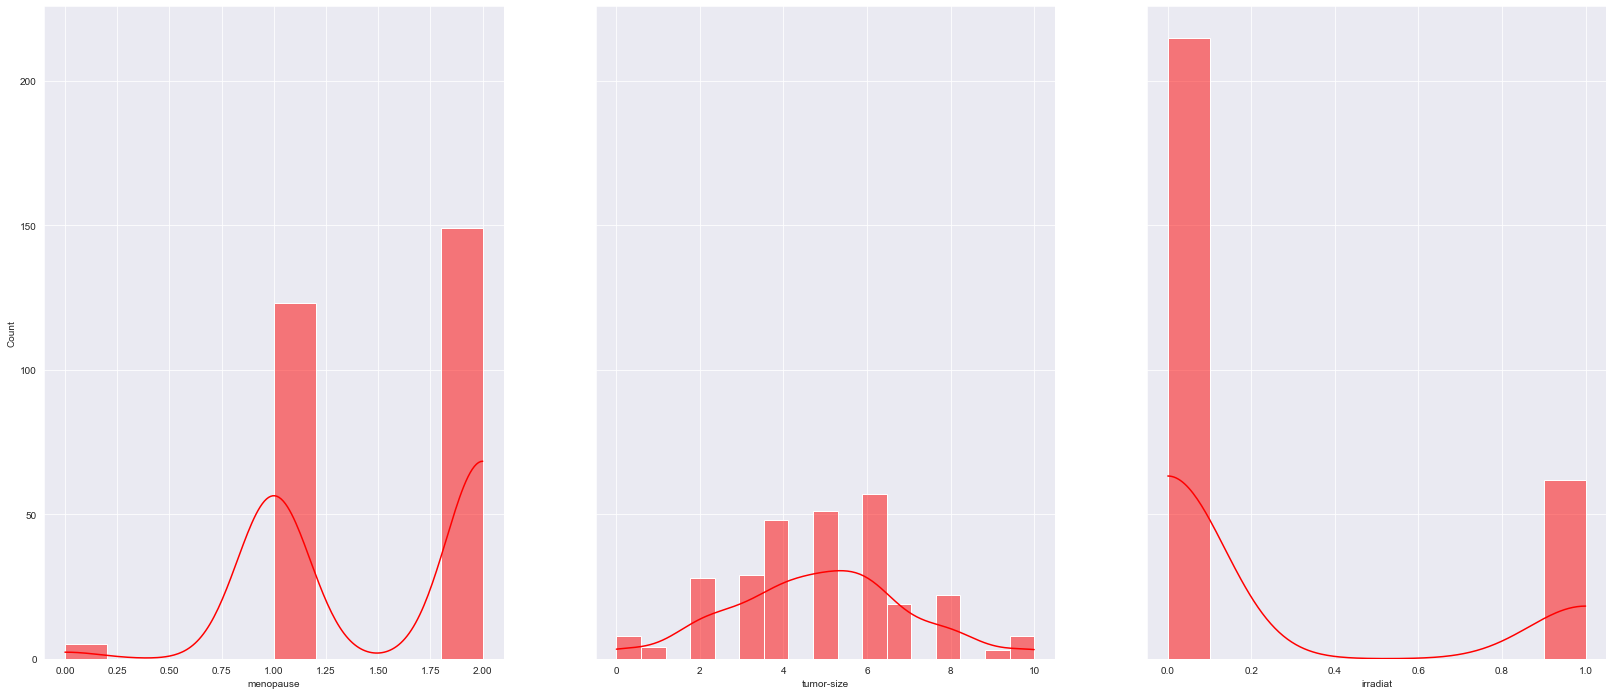

In [58]:
fig, axes = plt.subplots(1,3, figsize=(28,12), sharey=True)
sns.histplot(data, ax=axes[0],x="menopause",kde=True, color='r')
sns.histplot(data, ax=axes[1],x="tumor-size",kde=True, color='r')
sns.histplot(data, ax=axes[2],x="irradiat",kde=True, color='r')

In [59]:
class NaiveBayes:
    def fit(self, X_train, y_train):
        self.priors, self.conditional_probs = self._compute_probabilities(X_train, y_train)
        
    def predict(self, X_test):
        preds = []
        
        for _, row in X_test.iterrows():
            probs = []
            
            for class_val in self.priors.keys():
                p = self.priors[class_val]
                
                for feature, value in row.items():
                    if feature == 'Class':
                        continue
                    
                    key = (feature, value, class_val)
                    
                    if key in self.conditional_probs:
                        p *= self.conditional_probs[key]
                
                probs.append((class_val, p))
            
            preds.append(max(probs, key=lambda x: x[1])[0])
        
        return preds
    
    def _compute_probabilities(self, X, y):
        priors = dict()
        conditional_probs = dict()
        
        n_samples = X.shape[0]
        
        # Compute the prior probabilities for each class
        for class_val in y.unique():
            priors[class_val] = (y == class_val).sum() / n_samples
        
        # Compute the conditional probabilities for each feature and class
        for feature in X.columns:
            if feature == 'Class':
                continue
                
            for feature_val in X[feature].unique():
                for class_val in y.unique():
                    num = ((X[feature] == feature_val) & (y == class_val)).sum() + 1
                    denom = (y == class_val).sum() + X[feature].nunique()
                    
                    key = (feature, feature_val, class_val)
                    conditional_probs[key] = num / denom
        
        return priors, conditional_probs

In [66]:
# Split the data into X (features) and y (target)
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Train a Naive Bayes classifier on the training data
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)
print(y_pred)

[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]


In [67]:
# Evaluate the performance of the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6785714285714286


In [68]:
def validationOfNaiveBayes(X, y, n_folds=10):
    scores = []
    fold_size = X.shape[0] // n_folds
    
    for i in range(n_folds):
        start = i * fold_size
        end = (i+1) * fold_size
        
        X_test = X.iloc[start:end]
        y_test = y.iloc[start:end]
        X_train = X.drop(X.index[start:end])
        y_train = y.drop(y.index[start:end])
        
        model = NaiveBayes()
        model.fit(X_train, y_train)
        
        preds = model.predict(X_test)
        score = np.mean(preds == y_test)
        scores.append(score)
    
    return scores

In [70]:
scores = validationOfNaiveBayes(X_train, y_train)
for score in scores:
    print(round(score,3))
mean_score = np.mean(scores)
print(f"Mean score: {mean_score:.3f}")
print("Accuracy = ",round(mean_score*100,2))

0.773
0.773
0.636
0.818
0.636
0.864
0.818
0.773
0.727
0.727
Mean score: 0.755
Accuracy =  75.45
